# Customer Segmentation Analysis 
### Steps to solve the problem :
1. Import Libraries
2. Import Dataset
3. Data Exploration
4. Data Visualization
5. K-Means Clustering
6. Cluster Selection
7. Plot Clusters

## Import Libraries

In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
import os
warnings.filterwarnings('ignore')
py.offline.init_notebook_mode(connected = True)

In [87]:
# import helper module
from Helper_Module_Credit_Risk_Analysis import *
Custom_Helper_Module()


    Available General Custom Functions: 

    Check_Missing_Values(input_dataset)
    Check_Feature_Details(input_dataset, input_feature)
    Create_Dummy_Variables(input_dataset, input_feature_list)
    Preliminary_Feature_Selection(input_X_train, input_y_train)
    Check_Correlation(input_X_train)
    Check_Multicollinearity(input_X_train, numerical_feature_list)
    Make_Feature_Selection(input_X_train, input_y_train, max_validation_round)
    Remove_Outlies(input_dataset, input_features)

    Convert_Datetime_To_Months(df, column)
    Convert_Loan_Tenure_To_Months(df, column)
    Convert_Employment_Length_To_Years(df, column)
    


## Import Dataset

In [88]:
# import dataset
df = pd.read_csv('Mall_Customers.csv')

## Data Exploration

In [89]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [90]:
df.shape

(200, 5)

In [91]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [92]:
# CustomerID will not provide us any useful cluster information
# so we can safely drop this column
df.drop('CustomerID', axis = 1, inplace=True)

In [93]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [94]:
Check_Missing_Values(df)

Following featues have more than 80% missing values:  0
[]


,Missing_Data,Missing_Data (%),Data_Type
Gender,0,0.0,object
Age,0,0.0,int64
Annual Income (k$),0,0.0,int64
Spending Score (1-100),0,0.0,int64


In [95]:
Check_Feature_Details(df, 'Gender')

['Male' 'Female']


,Value_Counts,Value_Counts (%)
Female,112,56.0
Male,88,44.0


In [96]:
backup_df = df.copy()

## Data Visualization

In [97]:
plt.style.use('fivethirtyeight')

### Histograms

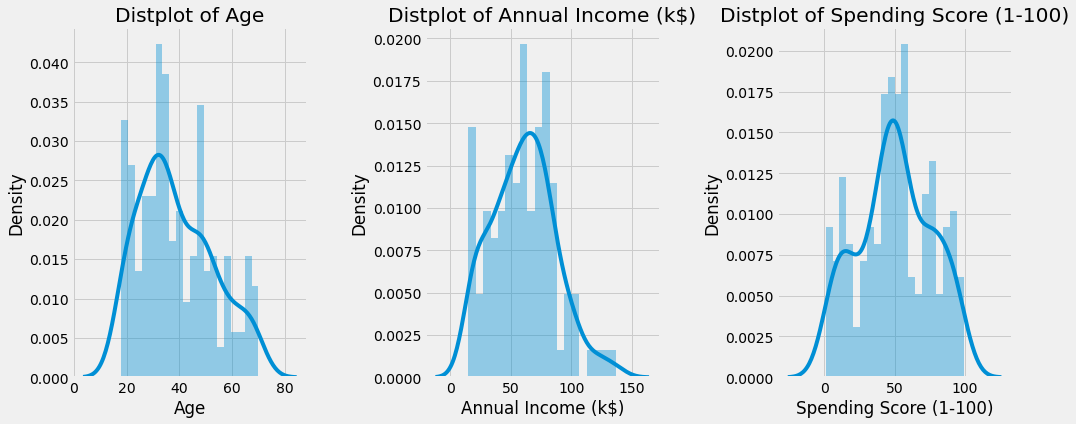

In [98]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Count Plot of Gender

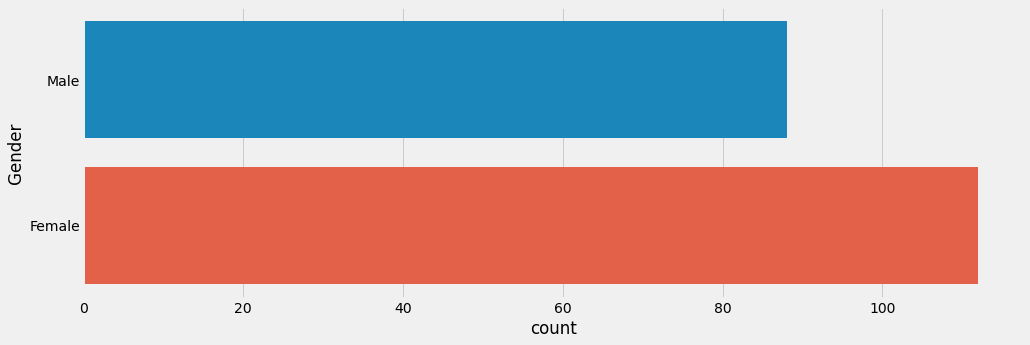

In [99]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

In [100]:
# keep a backup of the dataframe
backup_df = df.copy()

### Distribution of values in Age, Annual Income and Spending Score according to Gender

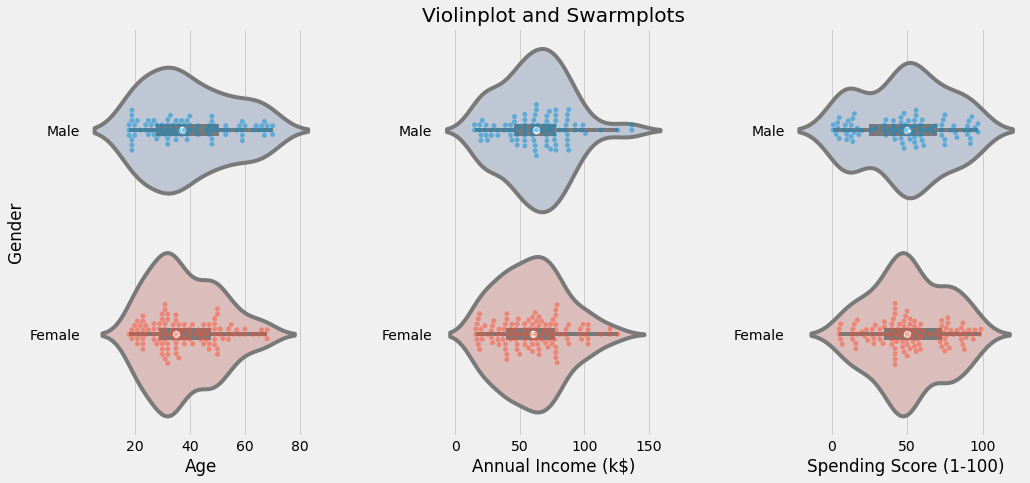

In [101]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df, alpha = 0.5)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violinplot and Swarmplots' if n == 2 else '')
plt.show()

### Get Dummies

In [102]:
# now let's get the dummies for the categorical variables
temp_df = pd.get_dummies(df, drop_first=True)

In [103]:
dummy_df = temp_df[['Gender_Male', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

In [104]:
dummy_df.head()

,Gender_Male,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Ploting the Relation between Gender, Age, Annual Income and Spending Score

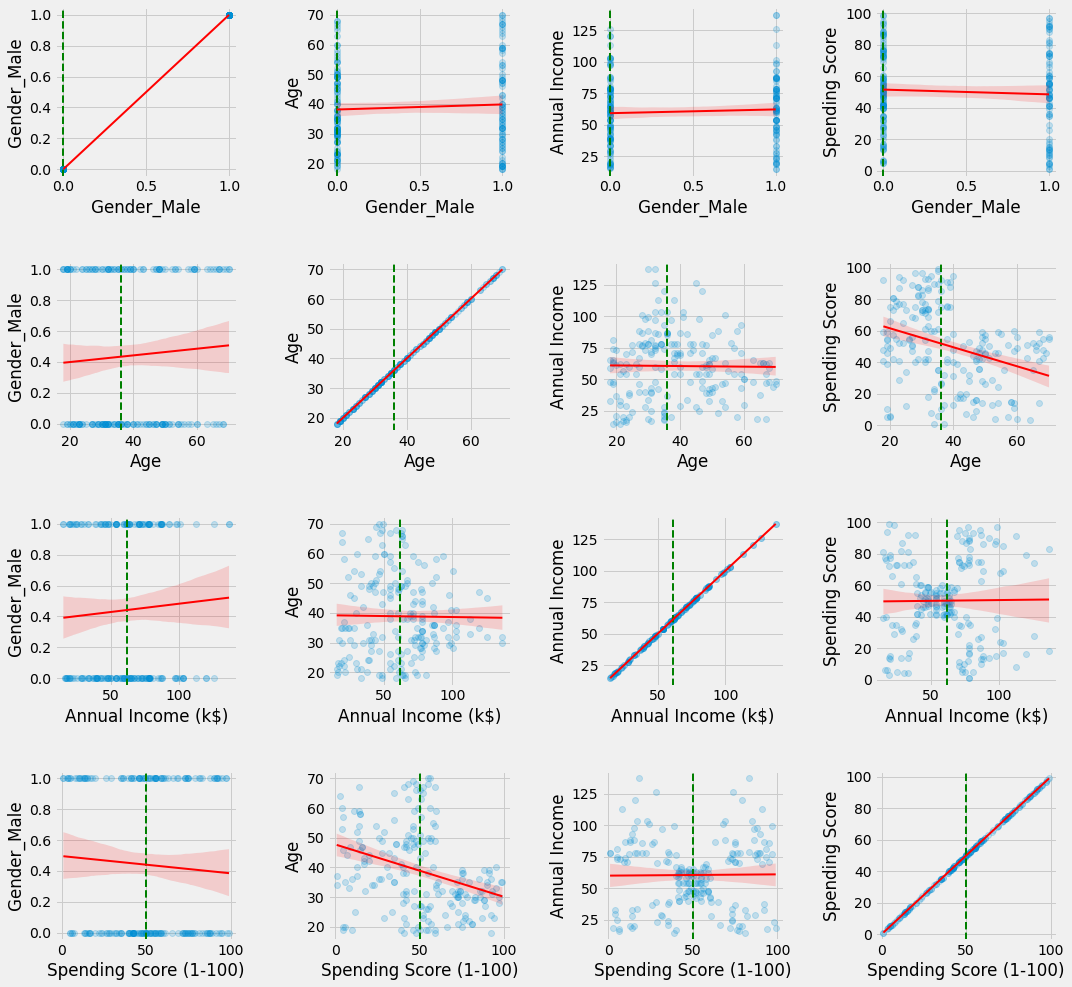

In [105]:
plt.figure(1 , figsize = (16 , 16))
n = 0 
for x in ['Gender_Male', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Gender_Male', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(4, 4, n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        plt.axvline(dummy_df[x].median(), color='g', linestyle='--',  linewidth=2)
        sns.regplot(x = x, y = y, data = dummy_df, scatter_kws = {'alpha': 0.2}, line_kws = {'linewidth':2, 'color': 'red'})
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
plt.show()

## Clustering using K- means

### 1. Segmentation using  Annual Income and Spending Score

In [106]:
df = backup_df.copy()

In [107]:
'''Annual Income and spending Score'''
column_list_for_kmeans = ['Annual Income (k$)', 'Spending Score (1-100)']

In [108]:
X = df[column_list_for_kmeans].copy()
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [109]:
standard_scaler = StandardScaler()
X[column_list_for_kmeans] = standard_scaler.fit_transform(X[column_list_for_kmeans])


In [110]:
inertia = []
for n in range(1 , 11):
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [111]:
kl = KneeLocator(list(range(1 , 11)), inertia, S=1.0, curve='convex', direction='decreasing')
optimum_cluster = kl.knee
print('Optimum number of clusters: ', optimum_cluster)

Optimum number of clusters:  5


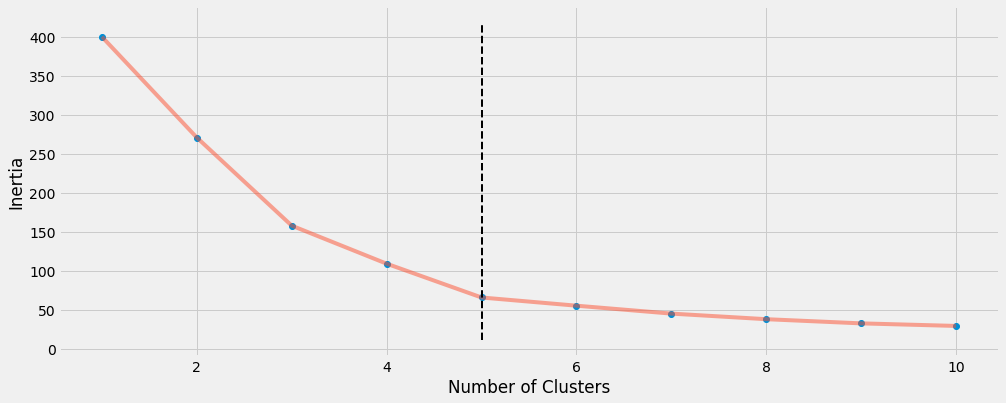

In [112]:
plt.figure(1, figsize = (15 ,6))
plt.plot(np.arange(1, 11) , inertia , 'o')
plt.plot(np.arange(1, 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.vlines(optimum_cluster, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', linewidth=2, color='black')
plt.show()

In [113]:
kmeans = KMeans(n_clusters = optimum_cluster, init = 'k-means++', random_state = 42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# now, lets calculate the silhouette score of this model
model_1_silhouette_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouette score: {:.2f}'.format(model_1_silhouette_score))

Silhouette score: 0.55


In [114]:
# add the cluster label and inverse scalar transformation
df['Cluster'] = labels.tolist()

In [115]:
# now lets make the centroid dataframe
centroids_df_column_names = ['centroid_x', 'centroid_y']
centroids_df = pd.DataFrame(data = centroids, columns = centroids_df_column_names)
centroids_df[centroids_df_column_names] = standard_scaler.inverse_transform(centroids_df[centroids_df_column_names])

In [116]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [117]:
centroids_df.head()

,centroid_x,centroid_y
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


In [118]:
x_feature = 'Annual Income (k$)'
y_feature = 'Spending Score (1-100)'
x_centroid = 'centroid_x'
y_centroid = 'centroid_y'

In [119]:
h = 0.01
x_min, x_max = df[x_feature].min() - 1, df[x_feature].max() + 1
y_min, y_max = df[y_feature].min() - 1, df[y_feature].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

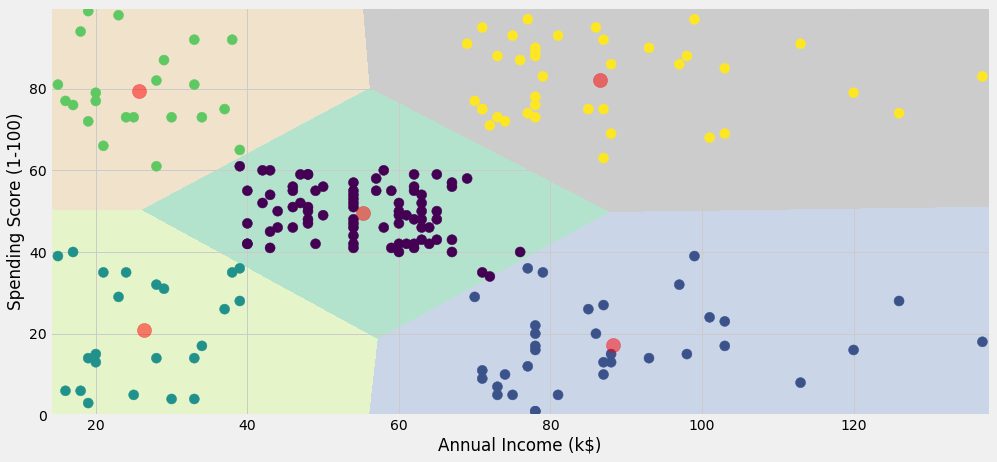

In [120]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')

plt.scatter( x = x_feature, y = y_feature, data = df, c = labels, s = 100)
plt.scatter(x = centroids_df[x_centroid].values, y = centroids_df[y_centroid].values, s = 200, c = 'red', alpha = 0.5)
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.show()

In [121]:
model_1_df = df.copy()
print('Silhouette score: {:.2f}'.format(model_1_silhouette_score))

Silhouette score: 0.55


### 2. Segmentation using Age, Annual Income and Spending Score

In [122]:
df = backup_df.copy()

In [123]:
'''Age, Annual Income and spending Score'''
column_list_for_kmeans = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [124]:
X = df[column_list_for_kmeans].copy()
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [125]:
standard_scaler = StandardScaler()
X[column_list_for_kmeans] = standard_scaler.fit_transform(X[column_list_for_kmeans])


In [126]:
inertia = []
for n in range(1 , 11):
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [127]:
kl = KneeLocator(list(range(1 , 11)), inertia, S=1.0, curve='convex', direction='decreasing')
optimum_cluster = kl.knee
print('Optimum number of clusters: ', optimum_cluster)

Optimum number of clusters:  4


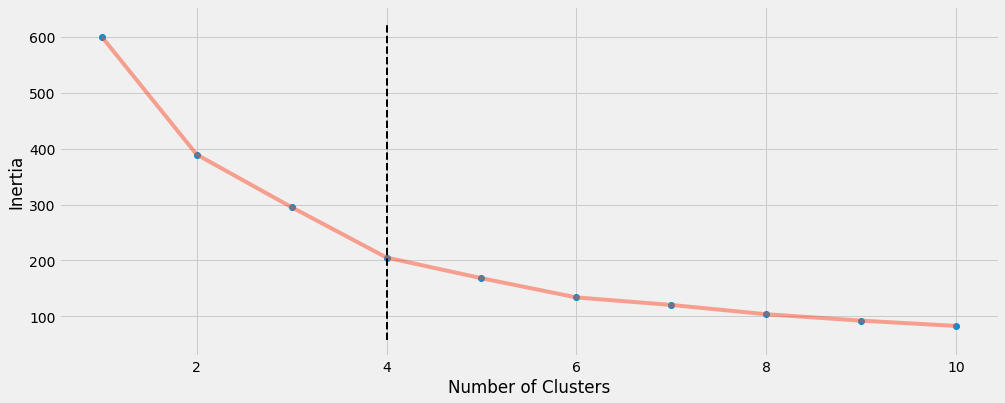

In [128]:
plt.figure(1, figsize = (15 ,6))
plt.plot(np.arange(1, 11) , inertia , 'o')
plt.plot(np.arange(1, 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.vlines(optimum_cluster, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', linewidth=2, color='black')
plt.show()

In [129]:
kmeans = KMeans(n_clusters = optimum_cluster, init = 'k-means++', random_state = 42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# now, lets calculate the silhouette score of this model
model_2_silhouette_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouette score: {:.2f}'.format(model_2_silhouette_score))

Silhouette score: 0.40


In [130]:
# add the cluster label and inverse scalar transformation
df['Cluster'] = labels.tolist()


In [131]:
# now lets make the centroid dataframe
centroids_df_column_names = ['centroid_x', 'centroid_y', 'centroid_z']
centroids_df = pd.DataFrame(data = centroids, columns = centroids_df_column_names)
centroids_df[centroids_df_column_names] = standard_scaler.inverse_transform(centroids_df[centroids_df_column_names])

In [132]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [133]:
centroids_df.head()

,centroid_x,centroid_y,centroid_z
0,39.368421,86.500000,19.578947
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,53.984615,47.707692,39.969231


In [134]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title = 'Age'), yaxis = dict(title = 'Annual Income'),zaxis = dict(title = 'Spending Score'))
trace_0 = go.Scatter3d(x=df['Age'], y=df['Annual Income (k$)'], z=df['Spending Score (1-100)'], mode='markers', marker=dict(color = labels, size = 5, line=dict(color= labels, width = 10)), name='Data')
trace_1 = go.Scatter3d(x=centroids_df['centroid_x'], y=centroids_df['centroid_y'], z=centroids_df['centroid_z'], mode='markers', marker=dict(color = 'Black', size = 10), name='Centroid')
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace_0, trace_1]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [135]:
model_2_df = df.copy()
print('Silhouette score: {:.2f}'.format(model_2_silhouette_score))

Silhouette score: 0.40


### 3. Segmentation using Gender, Age, Annual Income and Spending Score

In [136]:
df = backup_df.copy()

In [137]:
'''Gender, Age, Annual Income and spending Score'''
column_list_for_kmeans = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
column_list_for_scaling = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [138]:
X = df[column_list_for_kmeans].copy()
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [139]:

standard_scaler = StandardScaler()
X[column_list_for_scaling] = standard_scaler.fit_transform(X[column_list_for_scaling])


In [140]:
# now let's get the dummies for the categorical variables
X = pd.get_dummies(X, drop_first=True)

In [141]:
inertia = []
for n in range(1 , 11):
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [142]:
kl = KneeLocator(list(range(1 , 11)), inertia, S=1.0, curve='convex', direction='decreasing')
optimum_cluster = kl.knee
print('Optimum number of clusters: ', optimum_cluster)

Optimum number of clusters:  4


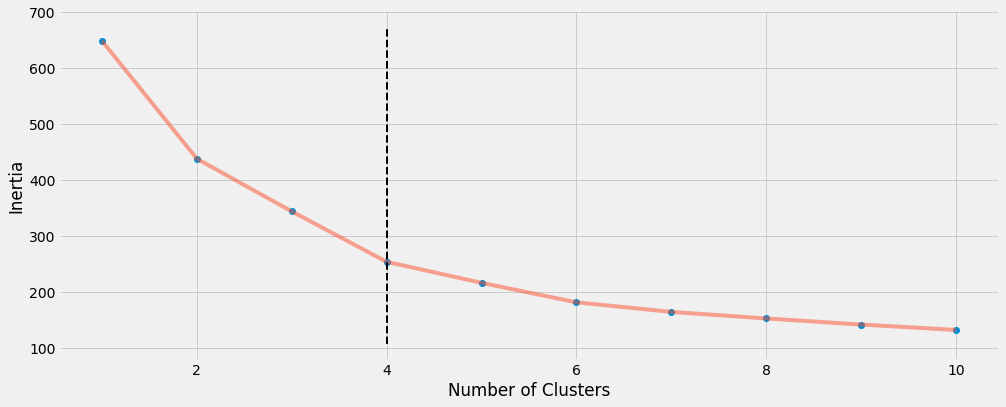

In [143]:
plt.figure(1, figsize = (15 ,6))
plt.plot(np.arange(1, 11) , inertia , 'o')
plt.plot(np.arange(1, 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.vlines(optimum_cluster, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', linewidth=2, color='black')
plt.show()

In [144]:
kmeans = KMeans(n_clusters = optimum_cluster, init = 'k-means++', random_state = 42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# now, lets calculate the silhouette score of this model
model_3_silhouette_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouette score: {:.2f}'.format(model_3_silhouette_score))

Silhouette score: 0.35


In [145]:
# add the cluster label and inverse scalar transformation
df['Cluster'] = labels.tolist()


In [146]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [147]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title = 'Age'), yaxis = dict(title = 'Annual Income'),zaxis = dict(title = 'Spending Score'))
trace = go.Scatter3d(x=df['Age'], y=df['Annual Income (k$)'], z=df['Spending Score (1-100)'], mode='markers', marker=dict(color = labels, size = 5, line=dict(color= labels, width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [148]:
model_3_df = df.copy()
print('Silhouette score: {:.2f}'.format(model_3_silhouette_score))

Silhouette score: 0.35


### 4. Segmentation using PCA

In [149]:
df = backup_df.copy()

In [150]:
'''Gender, Age, Annual Income and spending Score'''
column_list_for_kmeans = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
column_list_for_scaling = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [151]:
X = df[column_list_for_kmeans].copy()
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [152]:
standard_scaler = StandardScaler()
X[column_list_for_scaling] = standard_scaler.fit_transform(X[column_list_for_scaling])

In [153]:
# now let's get the dummies for the categorical variables
X = pd.get_dummies(X, drop_first=True)

In [154]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


[0.4095285  0.3081674  0.20723465 0.07506945]


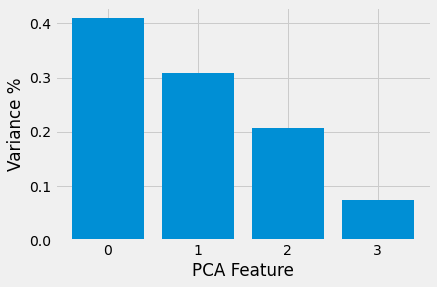

In [155]:
# pca = PCA(n_components=5)
pca = PCA()
principalComponents = pca.fit_transform(X)

features = range(pca.n_components_)
variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)
plt.bar(features, variance_ratio)
plt.xlabel('PCA Feature')
plt.ylabel('Variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [156]:
# first 3 PCA features explain > 80% of the data variance
# so we will build model with first 3 princiapl components
selected_PCA_components = PCA_components.iloc[:,:2]
print(selected_PCA_components)

            0         1
0   -0.600438 -1.737179
1   -1.649886 -1.789124
2    0.315381 -1.692772
3   -1.477989 -1.781317
4   -0.060545 -1.678691
..        ...       ...
195 -1.101819  2.201867
196  0.792047  2.517450
197 -1.089706  2.470818
198  0.425949  2.964343
199 -1.456371  2.874159

[200 rows x 2 columns]


In [157]:
inertia = []
for n in range(1 , 11):
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 42)
    kmeans.fit(selected_PCA_components)
    inertia.append(kmeans.inertia_)

In [158]:
kl = KneeLocator(list(range(1 , 11)), inertia, S=1.0, curve='convex', direction='decreasing')
optimum_cluster = kl.knee
print('Optimum number of clusters: ', optimum_cluster)

Optimum number of clusters:  4


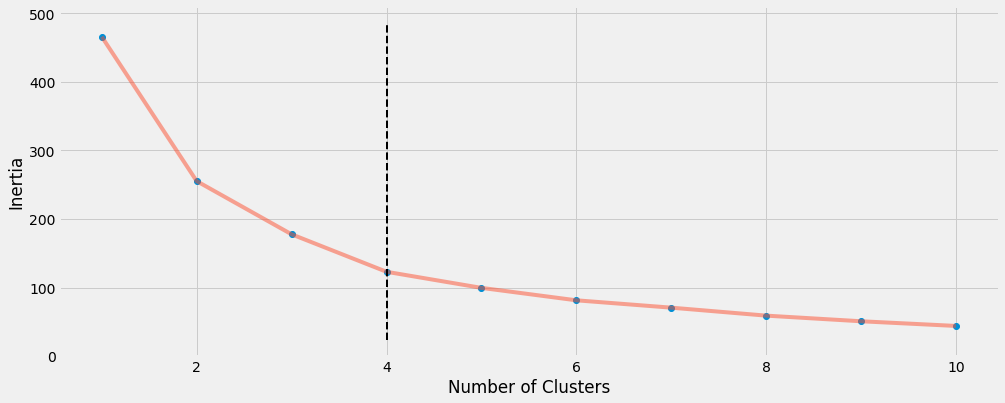

In [159]:
plt.figure(1, figsize = (15 ,6))
plt.plot(np.arange(1, 11) , inertia , 'o')
plt.plot(np.arange(1, 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.vlines(optimum_cluster, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', linewidth=2, color='black')
plt.show()

In [160]:
kmeans = KMeans(n_clusters = optimum_cluster, init = 'k-means++', random_state = 42)
kmeans.fit(selected_PCA_components)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# now, lets calculate the silhouette score of this model
model_4_silhouette_score = silhouette_score(selected_PCA_components, kmeans.labels_, metric='euclidean')
print('Silhouette score: {:.2f}'.format(model_4_silhouette_score))

Silhouette score: 0.42


In [161]:
# add the cluster label and inverse scalar transformation
df['Cluster'] = labels.tolist()


In [162]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,2


In [163]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title = 'Age'), yaxis = dict(title = 'Annual Income'),zaxis = dict(title = 'Spending Score'))
trace = go.Scatter3d(x=df['Age'], y=df['Annual Income (k$)'], z=df['Spending Score (1-100)'], mode='markers', marker=dict(color = labels, size = 5, line=dict(color= labels, width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [164]:
model_4_df = df.copy()
print('Silhouette score: {:.2f}'.format(model_4_silhouette_score))

Silhouette score: 0.42


## Cluster Analysis

In [165]:
model_4_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,2


In [166]:
df = model_4_df.copy()

In [167]:
# to compare attributes of the different clusters, lets find the 
# average of all variables across each cluster
median_df = df.groupby(['Cluster'], as_index=False).median()
median_df

,Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,43.0,85.0,16.0
1,1,30.0,76.0,74.0
2,2,24.0,33.0,72.0
3,3,50.0,48.0,46.0


In [168]:
gender_df = pd.DataFrame(df.groupby(['Cluster','Gender'])['Gender'].count())
gender_df

Gender
Cluster Gender        
0       Female      15
        Male        20
1       Female      34
        Male        25
2       Female      23
        Male        14
3       Female      40
        Male        29

In [169]:
male_df = df.groupby('Cluster')['Gender'].apply(lambda x: x[x == 'Male'].count())
female_df = df.groupby('Cluster')['Gender'].apply(lambda x: x[x == 'Female'].count())
female_percentage = round(female_df*100/(male_df+female_df), 2)
gender_perecentage_df = pd.DataFrame({'Cluster':female_percentage.index, 'Female(%)':female_percentage.values})
gender_perecentage_df


,Cluster,Female(%)
0,0,42.86
1,1,57.63
2,2,62.16
3,3,57.97


<AxesSubplot:xlabel='Cluster', ylabel='Female(%)'>

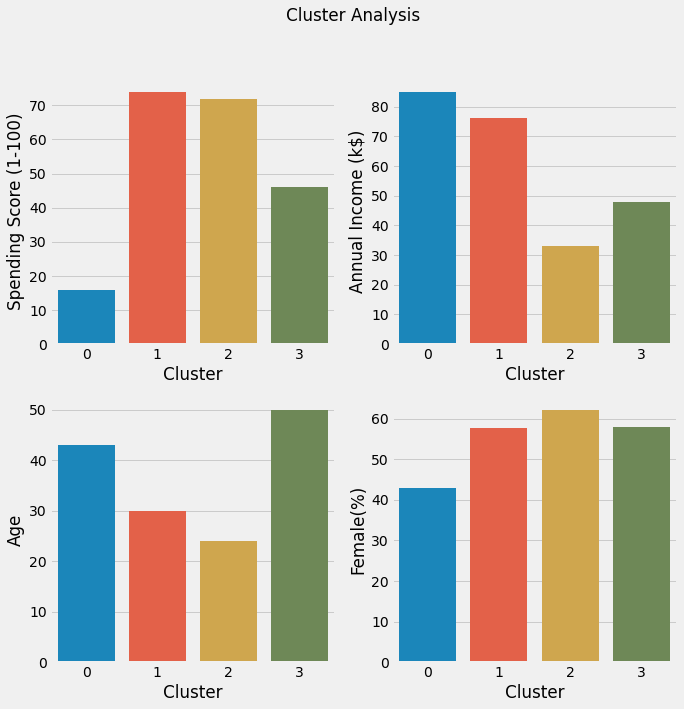

In [170]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Cluster Analysis')

# Spending Score
sns.barplot(ax=axes[0, 0], x='Cluster',y='Spending Score (1-100)', data=median_df)

# Annual Income
sns.barplot(ax=axes[0, 1], x='Cluster', y='Annual Income (k$)', data=median_df)

# Age
sns.barplot(ax=axes[1, 0], x='Cluster', y='Age', data=median_df)

# Gender
sns.barplot(ax=axes[1, 1], x='Cluster',y='Female(%)', data=gender_perecentage_df)

